In [72]:
pip install joblib

In [73]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

import joblib
import warnings
warnings.filterwarnings("ignore")

In [74]:
# Load data
df =  pd.read_csv('pokemon_gen7-8.csv')

In [75]:
#Looking at the first 5 rows of the dataset
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,841,Rowlet,Grass,Flying,320,68,55,55,50,50,42,7,0
1,842,Dartrix,Grass,Flying,420,78,75,75,70,70,52,7,0
2,843,Decidueye,Grass,Ghost,530,78,107,75,100,100,70,7,0
3,844,Litten,Fire,NaN,320,45,65,40,60,40,70,7,0
4,845,Torracat,Fire,NaN,420,65,85,50,80,50,90,7,0
5,846,Incineroar,Fire,Dark,530,95,115,90,80,90,60,7,0
6,847,Popplio,Water,NaN,320,50,54,54,66,56,40,7,0
7,848,Brionne,Water,NaN,420,60,69,69,91,81,50,7,0
8,849,Primarina,Water,Fairy,530,80,74,74,126,116,60,7,0
9,850,Pikipek,Normal,Flying,265,35,75,30,30,30,65,7,0


In [76]:
#How many rows and columns in the dataset?
df.shape

(187, 13)

In [77]:
#General information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           187 non-null    int64 
 1   Name        187 non-null    object
 2   Type 1      187 non-null    object
 3   Type 2      102 non-null    object
 4   Total       187 non-null    int64 
 5   HP          187 non-null    int64 
 6   Attack      187 non-null    int64 
 7   Defense     187 non-null    int64 
 8   Sp. Atk     187 non-null    int64 
 9   Sp. Def     187 non-null    int64 
 10  Speed       187 non-null    int64 
 11  Generation  187 non-null    int64 
 12  Legendary   187 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 19.1+ KB


In [78]:
#filling missing data
df['Type 2'] = df['Type 2'].replace(np.nan, "None")

In [79]:
#Checking if the data is still missing
df.isnull().sum()

,0
#,0
Name,0
Type 1,0
Type 2,0
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


In [80]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,841,Rowlet,Grass,Flying,320,68,55,55,50,50,42,7,0
1,842,Dartrix,Grass,Flying,420,78,75,75,70,70,52,7,0
2,843,Decidueye,Grass,Ghost,530,78,107,75,100,100,70,7,0
3,844,Litten,Fire,None,320,45,65,40,60,40,70,7,0
4,845,Torracat,Fire,None,420,65,85,50,80,50,90,7,0


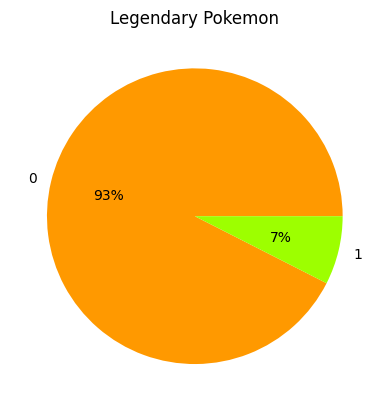

In [81]:
data_plot  = df['Legendary'].value_counts().to_list()
label_plot = df['Legendary'].value_counts().index.to_list()

title = 'Legendary Pokemon'

color = sns.color_palette('gist_rainbow')

plot       = plt.pie(data_plot, labels=label_plot, colors=color, autopct='%.0f%%')
plot_title = plt.title(title)

plt.show()

In [82]:
df = df.drop(['#', 'Name', 'Generation'], axis=1)

In [83]:
#Labeling categorical data
element = {
    "Water": 0,
    "Normal": 1,
    "Grass": 2,
    "Bug": 3,
    "Psychic": 4,
    "Fire": 5,
    "Electric": 6,
    "Rock": 7,
    "Dragon": 8,
    "Ground": 9,
    "Ghost": 10,
    "Dark": 11,
    "Poison": 12,
    "Steel": 13,
    "Fighting": 14,
    "Ice": 15,
    "Fairy": 16,
    "Flying": 17,
    "None": 18
}

df['Type 1'] = df['Type 1'].map(element)
df['Type 2'] = df['Type 2'].map(element)

In [84]:
# Path data dan model
data_path = df
model_path = 'model.pkl'

model = joblib.load(model_path)

features = data_path.drop('Legendary', axis=1)

predictions = model.predict(features)

data_path['Predicted'] = predictions

In [85]:
data_path.head(80)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Predicted
0,2,17,320,68,55,55,50,50,42,0,0
1,2,17,420,78,75,75,70,70,52,0,0
2,2,10,530,78,107,75,100,100,70,0,0
3,5,18,320,45,65,40,60,40,70,0,0
4,5,18,420,65,85,50,80,50,90,0,0
...,...,...,...,...,...,...,...,...,...,...,...
75,4,18,200,43,29,31,29,31,37,1,0
76,4,18,400,43,29,131,29,131,37,1,0
77,4,13,680,137,137,107,113,89,97,1,0
78,4,10,680,137,113,89,137,107,97,1,1


In [86]:
correct_predictions = (data_path['Legendary'] == data_path['Predicted']).sum()
false_predictions = (data_path['Legendary'] != data_path['Predicted']).sum()

print("Correct predictions:", correct_predictions)
print("False predictions:", false_predictions)

Correct predictions: 181
False predictions: 6


In [87]:
# Incorrect predictions
incorrect_predictions = data_path[data_path['Legendary'] != data_path['Predicted']]

incorrect_predictions.head(10)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Predicted
75,4,18,200,43,29,31,29,31,37,1,0
76,4,18,400,43,29,131,29,131,37,1,0
77,4,13,680,137,137,107,113,89,97,1,0
87,4,13,680,97,157,127,113,109,77,1,0
90,13,16,600,80,95,115,130,115,65,0,1
96,6,18,600,88,112,75,102,80,143,0,1


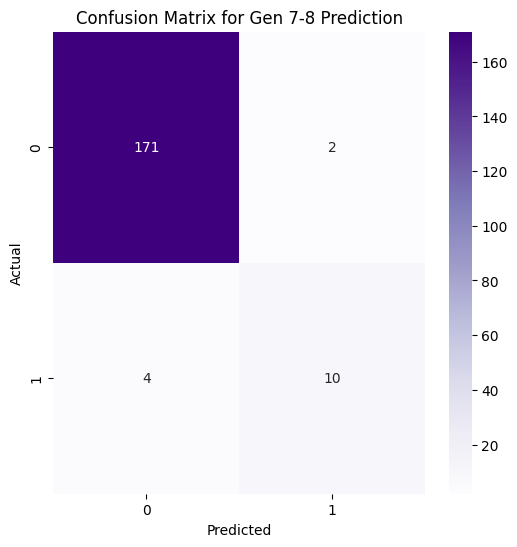

In [88]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(data_path['Legendary'], data_path['Predicted']), annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gen 7-8 Prediction')
plt.show()